In [1]:
import math
import pandas as pd
import tensorflow as tf
# import keras_tuner.tuners as kt
import matplotlib.pyplot as plt
import keras
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
import numpy as np
import pickle
np.random.seed(0)
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv1D, Conv2D, LeakyReLU, MaxPool1D, AveragePooling1D, UpSampling1D, Flatten, Dense, Reshape, BatchNormalization
# https://towardsdatascience.com/improve-your-model-performance-with-auto-encoders-d4ee543b4154
from tensorflow.keras import initializers
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

In [2]:
x_train_scaled = pd.read_csv('260_sample_train_scaled.csv').set_index("Patient_ID")
x_train_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.468042,0.335792,0.0,0.609518,0.535456,0.0,0.543158,0.622641,0.0,1.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.159464,0.0,0.173529,0.018188,0.0,0.623796,0.301179,0.0,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.335173,0.241577,0.0,0.659563,0.000000,0.0,0.853118,0.431083,0.0,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.181256,0.297248,0.0,0.837676,0.480372,0.0,0.392582,0.390569,0.0,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.319013,0.306320,0.0,0.893448,0.485539,0.0,0.259900,0.431818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.382762,0.384030,0.377332,0.360165,0.300915,0.340090,0.077348,0.890965,0.261140,0.205779,...,0.209212,0.301844,0.0,0.643267,0.143476,0.0,0.262892,0.189790,0.0,0.0
182_CD_plain,0.679910,0.584723,0.722426,0.643867,0.740014,0.650358,0.468650,0.295686,0.649939,0.609862,...,0.408592,0.042243,0.0,0.765285,0.527984,0.0,0.413798,0.270021,0.0,0.0
164_CD_plain,0.754656,0.556562,0.694062,0.748334,0.535534,0.133869,0.319071,0.154562,0.440487,0.824013,...,0.514164,0.364434,0.0,0.930260,0.481733,0.0,0.273699,0.433093,0.0,0.0


In [3]:
x_test_scaled = pd.read_csv('260_sample_test_scaled.csv').set_index("Patient_ID")
x_test_scaled

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
253_CD_plain,0.869185,0.841880,0.930171,0.886737,0.835678,0.297964,0.668498,0.266670,0.278122,0.933520,...,0.339788,0.326732,0.0,0.862246,0.074473,0.0,0.498941,0.349920,0.0,0.0
105_CD_plain,0.853562,0.933532,0.942213,0.794578,0.890482,0.206529,0.298987,0.350745,0.495663,0.849038,...,0.354602,-0.031527,0.0,0.717305,0.039214,0.0,0.697073,0.268224,0.0,0.0
2_CD_plain,0.165531,0.141475,0.263684,0.198091,0.160503,0.888878,0.000000,0.134461,0.989132,0.202203,...,0.320002,0.379134,0.0,0.604202,0.610072,0.0,0.324065,0.375123,0.0,0.0
184_CD_plain,0.717121,0.660314,0.769417,0.752737,0.694874,0.514735,0.692365,0.271127,0.650742,0.694599,...,0.445680,0.178908,0.0,0.702114,0.325357,0.0,0.390919,0.185509,0.0,0.0
312_CD_plain,0.730072,0.722909,0.713076,0.743545,0.679258,0.308459,0.399235,0.129019,0.597529,0.720390,...,0.419254,0.312215,0.0,0.821584,0.632007,0.0,0.183158,0.271359,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [4]:
full_ds = pd.concat([x_train_scaled, x_test_scaled])
full_ds

,AADAC,APOA1,APOA4,APOB,APOC3,AQP9,C6,CEACAM7,CHI3L1,ABCC2,...,TAF15,ZFYVE20,LOC100420253,LY6G5B,C5orf58,RSL24D1P1,MIEN1,PCBP1_AS1,LOC100133165,DNAJB8
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,0.702813,0.799052,0.719665,0.729547,0.794953,0.256451,1.000000,0.363133,0.374212,0.611161,...,0.468042,0.335792,0.0,0.609518,0.535456,0.0,0.543158,0.622641,0.0,1.0
168_CD_plain,0.751408,0.603707,0.622768,0.627712,0.606860,0.520576,0.311962,0.251356,0.553554,0.441131,...,0.000000,0.159464,0.0,0.173529,0.018188,0.0,0.623796,0.301179,0.0,0.0
72_control,0.786508,0.755331,0.739605,0.756170,0.819875,0.391132,0.648401,0.134017,0.200420,0.679453,...,0.335173,0.241577,0.0,0.659563,0.000000,0.0,0.853118,0.431083,0.0,0.0
120_control,0.707491,0.662993,0.648072,0.764621,0.654276,0.633929,0.579519,0.248934,0.759250,0.755407,...,0.181256,0.297248,0.0,0.837676,0.480372,0.0,0.392582,0.390569,0.0,0.0
258_CD_plain,0.701039,0.662511,0.707208,0.834562,0.670160,0.410612,0.370517,0.244987,0.445387,0.798000,...,0.319013,0.306320,0.0,0.893448,0.485539,0.0,0.259900,0.431818,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107_CD_plain,0.736123,0.658232,0.772323,0.685637,0.658755,0.250970,0.247307,0.422075,0.555944,0.603675,...,0.379431,0.233196,0.0,0.759342,0.567491,0.0,0.404604,0.190411,0.0,0.0
279_CD_plain,0.220614,0.202090,0.182810,0.113245,0.105744,0.699851,0.000000,0.908485,0.688912,0.178259,...,0.181052,0.342262,0.0,0.639644,0.540444,0.0,0.397274,0.061934,0.0,0.0
179_CD_plain,0.724476,0.726774,0.766943,0.776284,0.690339,0.380637,0.440449,0.318944,0.558600,0.738787,...,0.331961,0.275577,0.0,0.886616,0.658049,0.0,0.259391,0.471132,0.0,0.0


In [5]:
train_set = x_train_scaled.copy()

In [6]:
test_set = x_test_scaled.copy()

### Dimensionality reduction with PCA

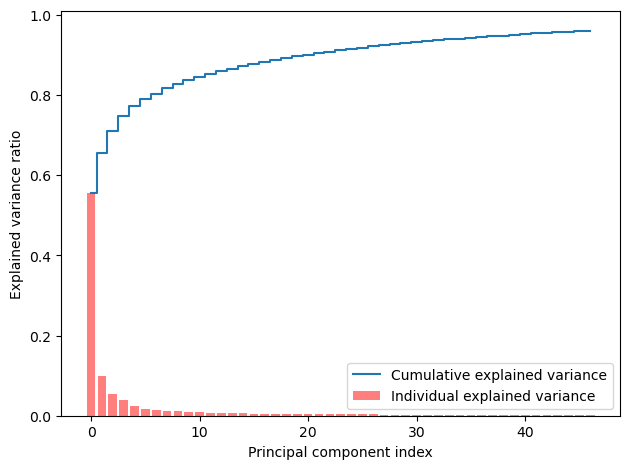

In [7]:
#https://vitalflux.com/pca-explained-variance-concept-python-example/#google_vignette

pca = PCA()
pca = PCA(n_components=.96)
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(train_set)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', color='r',label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [8]:
# https://www.datacamp.com/tutorial/principal-component-analysis-in-python

def encode_pca(dataset):
    comp_cols = np.asarray(np.arange(2), dtype=str)
    pca_x_test = PCA(n_components=32)
    principalComponents_x_test = pca_x_test.fit_transform(dataset)
    pca_x_test_ds = pd.DataFrame(data = principalComponents_x_test, 
                                       index=dataset.index)
    return pca_x_test_ds, pca_x_test

full_pca_dataset, pca_x = encode_pca(full_ds)
split_pt = int(0.7 * len(full_pca_dataset))
pca_test_dataset = full_pca_dataset[split_pt:]
pca_train_dataset = full_pca_dataset[:split_pt]

In [9]:
pca_train_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,-1.400480,0.036085,0.633785,0.991954,1.244477,1.137486,0.029610,0.658527,1.078466,-0.619487,...,0.470832,0.133802,-0.203272,-0.410425,0.186449,0.298332,-0.400682,0.767596,0.619227,0.085812
168_CD_plain,0.343929,-0.897671,0.955659,-0.201677,0.422730,-0.572408,0.003687,0.056367,0.171045,0.062771,...,0.027877,-0.336420,-0.175358,0.370251,-0.039556,0.055334,0.058026,0.161180,0.149297,-0.265662
72_control,-2.307192,-0.267483,1.578081,0.496850,-0.234867,0.234571,0.184197,0.036992,-0.068803,-0.119890,...,0.183052,0.194263,0.234877,0.178692,0.362024,-0.116276,-0.019640,-0.014161,0.195361,-0.416527
120_control,0.352933,-1.007575,-0.545913,0.208984,-0.308962,-0.011900,-0.357425,0.045246,-0.176911,-0.057539,...,0.046615,0.026036,-0.092182,0.198564,0.214210,-0.068817,0.149709,-0.144454,-0.024551,-0.078279
258_CD_plain,-1.060160,-0.005791,-0.675548,0.336661,-0.086003,0.094171,-0.527973,-0.092358,0.061105,0.117648,...,-0.081974,-0.346245,0.006149,0.066966,-0.062242,0.032586,0.045676,0.160777,-0.083701,-0.201276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,0.518700,2.631580,0.914480,-1.113737,-0.453870,-0.297425,0.328632,0.365649,0.381446,0.426910,...,-0.247678,-0.078042,0.051630,-0.065564,0.249531,-0.063245,0.432105,-0.029305,0.191425,-0.047575
182_CD_plain,0.876848,-0.873024,-0.229033,-0.623545,0.243320,0.249689,0.376666,-0.193785,-0.063964,-0.053892,...,0.198387,0.005078,0.106484,-0.248362,-0.114181,-0.104506,-0.110896,-0.119660,0.091979,0.218882
164_CD_plain,-1.977341,1.297043,-0.604174,0.409995,0.269979,0.258461,-0.132664,-0.176443,-0.008317,0.210307,...,-0.170181,0.229245,-0.190584,0.244012,0.039333,-0.238115,-0.067049,0.050171,0.149764,0.065102


In [10]:
# pca_train_dataset.to_csv("pca_train_dataset.csv")

In [11]:
# print('Explained variation per principal component: {}'.format(pca_x_test.explained_variance_ratio_))
# print("Total variance explained:",np.sum(pca_x_test.explained_variance_ratio_))

In [12]:
# pc1_var, pc2_var = np.round(pca_x_test.explained_variance_ratio_ * 100, 1)
# pc1_var

### Dimensionality reduction with autoencoder

In [13]:
sh = test_set.head(1).shape

In [14]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV

from keras.optimizers import Adam, SGD, Adadelta

n_inputs = 219
n_bottleneck = 32
encoder = Sequential(
            [

#                 Input(shape=(n_inputs,)),
                # encoder level 1
                Dense(n_inputs*2),
                BatchNormalization(),
                LeakyReLU(),
                # encoder level 2
                Dense(n_inputs),
                BatchNormalization(),
                LeakyReLU(),
                # bottleneck
                Dense(n_bottleneck)
            ]
        )

In [15]:
encoder.load_weights("encoder_ckpt")
encoder.build(sh) 
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (1, 438)                  96360     
                                                                 
 batch_normalization (BatchN  (1, 438)                 1752      
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (1, 438)                  0         
                                                                 
 dense_1 (Dense)             (1, 219)                  96141     
                                                                 
 batch_normalization_1 (Batc  (1, 219)                 876       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (1, 219)                  0

In [16]:
def ae_encode_dataset(encoder, dataset):
    latent_var = np.arange(32)
    recon = encoder(dataset.values)
    r = pd.DataFrame(recon, columns=latent_var, index=dataset.index)
    return r
    
full_ae_dataset = ae_encode_dataset(encoder, full_ds)

split_pt = int(0.7 * len(full_ae_dataset))
ae_test_dataset = full_ae_dataset[split_pt:]
ae_train_dataset = full_ae_dataset[:split_pt]

In [17]:
ae_train_dataset

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
Patient_ID,,,,,,,,,,,,,,,,,,,,,
55_control,2.884348,-4.333632,1.534629,0.357453,0.831423,-0.201379,-0.335116,1.899084,-1.299261,-0.198478,...,2.173890,0.097263,0.444464,0.296948,1.785042,-0.130478,1.609985,2.002768,0.458599,0.722745
168_CD_plain,1.049997,0.968498,-0.634117,-1.679890,1.635449,-2.056087,-0.223816,1.611414,-0.198338,-1.088065,...,0.259527,-1.898594,-0.041199,-1.653017,-2.995473,-1.641031,-1.288697,0.736618,1.602979,-2.933374
72_control,1.775126,-4.049808,1.087583,1.459852,1.401432,0.852619,2.032758,0.495711,-0.845361,-0.557329,...,0.797558,1.375275,0.568535,2.058962,5.145083,-0.905856,0.867203,3.922681,3.519151,5.548365
120_control,0.117591,0.435450,-0.473291,-1.583053,0.799566,-2.394346,-0.706611,0.784904,0.150020,-2.133907,...,-0.543700,-0.798991,-0.046313,-1.795849,-3.107322,-0.769194,-2.614375,1.161695,0.380128,-3.846728
258_CD_plain,0.443390,-0.772829,0.884035,-0.374245,-0.443627,0.055477,-0.811601,0.414232,-0.582810,-0.579333,...,-0.419681,1.280246,0.369904,-0.106852,2.210283,-1.252376,0.158098,1.858046,0.539129,0.515659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15_CD_plain,-3.672475,0.834738,1.542264,2.185633,-1.834641,3.122175,-1.350632,-2.351135,0.525460,3.629492,...,0.510670,-0.614047,2.294713,4.817264,1.498689,3.247430,3.975865,-4.355250,-1.201291,4.786653
182_CD_plain,-0.037418,1.366161,-0.056551,-1.735336,0.798326,-1.246346,-0.713014,0.526173,0.040249,-0.985651,...,0.190898,-0.660282,-0.221193,-1.727492,-3.602331,0.124196,-1.659816,-0.023671,-0.760651,-3.536419
164_CD_plain,0.310530,-2.311946,2.365372,1.838397,-1.330654,1.877666,-0.140262,-0.564555,-1.049672,0.395509,...,0.349844,2.943312,1.415317,2.549941,6.379101,-1.128445,1.433520,1.920403,0.837956,5.438933


## True labels

In [18]:
train_patient_ids = np.array(pca_train_dataset.index)
train_patient_ids

array(['55_control', '168_CD_plain', '72_control', '120_control',
       '258_CD_plain', '254_CD_deep_ulcer', '9_CD_plain', '111_CD_plain',
       '57_CD_plain', '216_CD_deep_ulcer', '263_CD_deep_ulcer',
       '95_CD_deep_ulcer', '31_control', '172_CD_plain', '310_CD_plain',
       '68_CD_plain', '65_control', '285_CD_plain', '201_CD_plain',
       '223_CD_deep_ulcer', '320_CD_plain', '8_CD_plain',
       '99_CD_deep_ulcer', '90_control', '296_CD_deep_ulcer',
       '219_CD_deep_ulcer', '138_CD_deep_ulcer', '38_control',
       '113_CD_plain', '76_control', '146_CD_deep_ulcer',
       '147_CD_deep_ulcer', '186_CD_plain', '158_CD_plain',
       '299_CD_plain', '178_CD_plain', '189_CD_plain', '266_CD_plain',
       '231_CD_deep_ulcer', '198_CD_plain', '6_CD_deep_ulcer',
       '30_CD_plain', '265_CD_plain', '181_CD_deep_ulcer', '16_CD_plain',
       '264_CD_deep_ulcer', '209_CD_plain', '83_control', '214_CD_plain',
       '193_CD_deep_ulcer', '104_CD_plain', '66_CD_plain', '188_CD_plain

In [19]:
test_patient_ids = np.array(pca_test_dataset.index)
test_patient_ids

array(['253_CD_plain', '105_CD_plain', '2_CD_plain', '184_CD_plain',
       '312_CD_plain', '271_CD_plain', '62_CD_deep_ulcer',
       '167_CD_deep_ulcer', '196_CD_deep_ulcer', '34_control',
       '23_CD_deep_ulcer', '58_CD_plain', '197_CD_plain',
       '93_CD_deep_ulcer', '229_CD_deep_ulcer', '293_CD_plain',
       '192_CD_plain', '52_CD_plain', '46_CD_deep_ulcer', '268_CD_plain',
       '176_CD_deep_ulcer', '228_CD_plain', '215_CD_plain',
       '307_CD_plain', '49_CD_deep_ulcer', '183_CD_deep_ulcer',
       '191_CD_plain', '270_CD_plain', '41_control', '78_control',
       '50_CD_deep_ulcer', '236_CD_deep_ulcer', '206_CD_plain',
       '19_control', '211_CD_plain', '47_CD_plain', '262_CD_plain',
       '82_control', '161_CD_plain', '137_CD_plain', '180_control',
       '260_CD_deep_ulcer', '134_CD_plain', '289_CD_plain',
       '314_CD_plain', '177_CD_deep_ulcer', '212_CD_deep_ulcer',
       '118_control', '112_CD_plain', '132_CD_plain', '40_CD_plain',
       '230_CD_deep_ulcer', 

In [20]:
def classify(x):
    if "_control" in x: # control
        return 0
    elif "CD_plain" in x: # Crohn's Disease no deep ulcer
#         print(x)
        return 1
    elif "CD_deep_ulcer" in x: # Crohn's Disease deep ulcer
#         print(x)
        return 2
    else:
        return 3 # Ulcerative Collitis

vec = np.vectorize(classify)

train_disease_labels = vec(train_patient_ids)
test_disease_labels = vec(test_patient_ids)

In [21]:
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

## KMeans clustering

### Fit KMeans in latent space with PCA dimensionality reduction

In [22]:
pca_test_dataset.shape

(78, 32)

In [23]:
num_c=4
kmeans = KMeans(num_c, random_state=0).fit(pca_train_dataset)
k_labels_train = kmeans.predict(pca_train_dataset)
k_labels_test = kmeans.predict(pca_test_dataset)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [24]:
for i in range(1, num_c+1):
    k_labels_train = np.concatenate([k_labels_train, [-i]])
    k_labels_test = np.concatenate([k_labels_test, [-i]])

In [25]:
k_labels_test.shape

(82,)

In [26]:
train_disease_labels_ext = np.concatenate([train_disease_labels, [-1]*num_c])
test_disease_labels_ext = np.concatenate([test_disease_labels, [-1]*num_c])


In [27]:
# no_IBD = train_disease_labels_ext == 0
# CD_no_ulcer = train_disease_labels_ext == 1
# CD_deep_ulcer = train_disease_labels_ext == 2
# UC = train_disease_labels_ext == 3

In [28]:
cent_df = pd.DataFrame(kmeans.cluster_centers_)
cent_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,3.440699,0.168137,-0.044193,0.363770,-0.175692,0.024284,0.189742,-0.008759,-0.069015,-0.017924,...,-0.010473,-0.072712,0.041461,0.017883,-0.015309,-0.017881,-0.047463,0.001163,-0.023378,0.002005
1,-1.925962,0.025548,-0.047064,0.092481,-0.039849,0.015003,0.028867,0.010442,-0.006053,0.041507,...,0.002245,0.005266,0.011483,0.003069,-0.013931,0.009575,-0.011674,0.023842,0.002102,0.019630
2,0.860148,-0.569359,-0.095020,-0.210712,0.157623,-0.031839,-0.053057,0.026821,0.034649,0.017072,...,0.016168,0.018922,-0.033466,-0.004820,0.019879,-0.026050,0.005329,-0.000466,0.001220,-0.002361
3,1.215283,2.437769,1.169820,-0.864062,-0.301852,0.041446,-0.163015,0.016959,-0.114962,0.108132,...,-0.053253,0.023815,-0.084195,-0.121314,0.026000,-0.012729,0.045841,0.022553,0.100436,-0.024733


In [29]:
km_pca_dataset_full = pd.concat([full_pca_dataset, cent_df])

### Visualise in 2D with tSNE (PCA dimensionality reduction)

In [30]:
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(km_pca_dataset_full)
X_test = X[split_pt:]
X_train = np.concatenate([X[:split_pt], X[-num_c:]])

# representation of the KMeans model (both)
centers = X[-num_c:]
radii = [cdist(X_train[k_labels_train == i], [center]).max()
         for i, center in enumerate(centers)]

In [31]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html


def plot_kmeans(Y, disease_labels, k_labels, centers, radii, reduction, num_c=4, test_set=True, selected_patient_idx=None):


    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))


    label_sets = [k_labels, disease_labels]
    num_clusters = 3
    dset = "test" if test_set else "train"


    for i, label_set in enumerate(label_sets):
        ax = subplots[i]

        dset = "test" if test_set else "train"

        if i==0:
            num_clusters = num_c
            cluster_names = ["Cluster " + str(i) for i in range(num_clusters)]
            colours = ["chocolate", "darkblue", "magenta", "yellow", "blue"]
            ax.set_title("KMeans clustering on " + dset + " set with cluster labels shown \n (" + reduction + " dimensionality reduction)",
                         wrap=True)
        else:
            num_clusters = 3
            cluster_names = ["Control", "CD no ulcer", "CD deep ulcer"]
            colours = ["green", "orange", "red"]
            ax.set_title("KMeans clustering on " + dset + " set with true labels shown \n (" + reduction + " dimensionality reduction)",
                         wrap=True)
        for i in range(num_clusters):
            ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2) 



        for c, r in zip(centers, radii):
            ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

        if selected_patient_idx is not None:
            ax.scatter(Y[selected_patient_idx, 0], Y[selected_patient_idx, 1], c="cyan", s=400, marker='*',edgecolor='black', linewidth=.7, label="Selected patient")

        ax.legend()

        ax.axis("tight")
    plt.show()




C:\Users\shard\AppData\Local\Temp\ipykernel_12868\3552133945.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


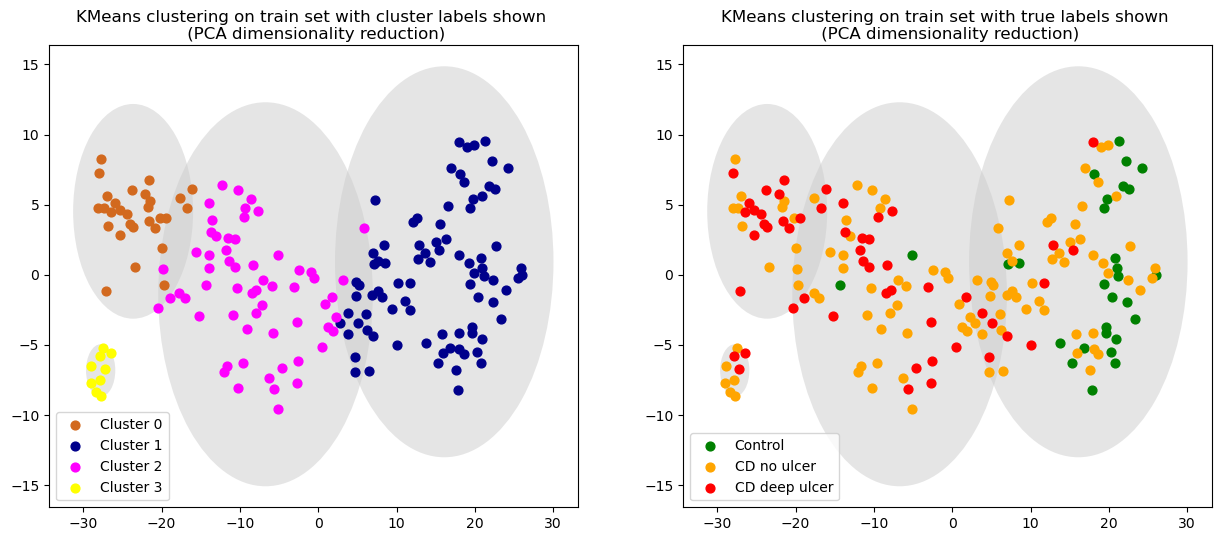

In [32]:
plot_kmeans(X_train, train_disease_labels_ext, k_labels_train, centers, radii, "PCA", test_set=False)

C:\Users\shard\AppData\Local\Temp\ipykernel_12868\3552133945.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


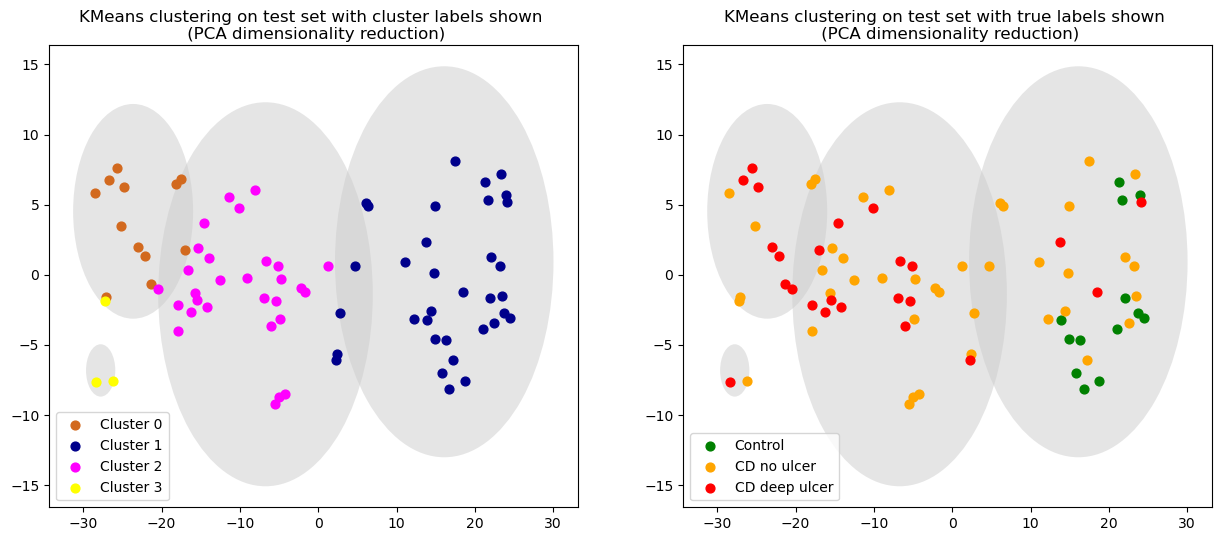

In [33]:
plot_kmeans(X_test, test_disease_labels_ext, k_labels_test, centers, radii, "PCA", test_set=True)

### Fit KMeans in latent space with autoencoder dimensionality reduction

In [34]:
pca_test_dataset.shape

(78, 32)

In [35]:
num_c=4
kmeans = KMeans(num_c, random_state=0).fit(ae_train_dataset)
k_labels_train = kmeans.predict(ae_train_dataset)
k_labels_test = kmeans.predict(ae_test_dataset)


C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [36]:
for i in range(1, num_c+1):
    k_labels_train = np.concatenate([k_labels_train, [-i]])
    k_labels_test = np.concatenate([k_labels_test, [-i]])

In [37]:
k_labels_test.shape

(82,)

In [38]:
train_disease_labels_ext = np.concatenate([train_disease_labels, [-1]*num_c])
test_disease_labels_ext = np.concatenate([test_disease_labels, [-1]*num_c])


In [39]:
# no_IBD = train_disease_labels_ext == 0
# CD_no_ulcer = train_disease_labels_ext == 1
# CD_deep_ulcer = train_disease_labels_ext == 2
# UC = train_disease_labels_ext == 3

In [40]:
cent_df = pd.DataFrame(kmeans.cluster_centers_)
cent_df

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1.069732,-1.050865,0.762944,-0.272477,0.379688,-0.056351,-0.258120,0.689728,-0.646842,-0.842954,...,-0.106128,1.382219,0.304986,-0.316808,1.979102,-1.235109,0.214824,2.212252,0.811988,0.708354
1,-4.576350,2.580169,0.167215,3.342591,-1.284120,0.460580,-0.575087,-1.975563,2.305684,2.685670,...,-0.157648,-3.517726,3.354300,3.470201,-5.838798,4.697826,0.219104,-6.549845,-3.354504,0.779193
2,1.771901,-4.016166,1.887038,2.257793,-0.369028,1.154385,0.811586,-0.163401,-1.572020,0.036140,...,0.248428,2.821053,1.370640,2.198367,7.190885,-1.272368,1.593051,3.904659,2.084829,6.335150
3,-0.637178,1.407095,-0.303032,-0.502051,0.575133,-1.357888,-0.595586,0.298157,0.533106,-0.640793,...,0.029986,-1.531399,0.358112,-0.758488,-4.342674,0.426047,-1.682600,-1.070805,-0.963674,-2.952017


In [41]:
km_ae_dataset_full = pd.concat([full_ae_dataset, cent_df])
km_ae_dataset_full

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
55_control,2.884348,-4.333632,1.534629,0.357453,0.831423,-0.201379,-0.335116,1.899084,-1.299261,-0.198478,...,2.173890,0.097263,0.444464,0.296948,1.785042,-0.130478,1.609985,2.002768,0.458599,0.722745
168_CD_plain,1.049997,0.968498,-0.634117,-1.679890,1.635449,-2.056087,-0.223816,1.611414,-0.198338,-1.088065,...,0.259527,-1.898594,-0.041199,-1.653017,-2.995473,-1.641031,-1.288697,0.736618,1.602979,-2.933374
72_control,1.775126,-4.049808,1.087583,1.459852,1.401432,0.852619,2.032758,0.495711,-0.845361,-0.557329,...,0.797558,1.375275,0.568535,2.058962,5.145083,-0.905856,0.867203,3.922681,3.519151,5.548365
120_control,0.117591,0.435450,-0.473291,-1.583053,0.799566,-2.394346,-0.706611,0.784904,0.150020,-2.133907,...,-0.543700,-0.798991,-0.046313,-1.795849,-3.107322,-0.769194,-2.614375,1.161695,0.380128,-3.846728
258_CD_plain,0.443390,-0.772829,0.884035,-0.374245,-0.443627,0.055477,-0.811601,0.414232,-0.582810,-0.579333,...,-0.419681,1.280246,0.369904,-0.106852,2.210283,-1.252376,0.158098,1.858046,0.539129,0.515659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256_CD_deep_ulcer,0.393315,1.251938,0.847358,-1.503569,0.178442,-0.636963,-0.947844,0.331905,0.146715,-0.768307,...,-0.310113,0.528784,0.067325,-1.012095,-0.773987,-0.896308,-0.585540,0.719324,-0.479167,-1.701732
0,1.069732,-1.050865,0.762944,-0.272477,0.379688,-0.056351,-0.258120,0.689728,-0.646842,-0.842954,...,-0.106128,1.382219,0.304986,-0.316808,1.979102,-1.235109,0.214824,2.212252,0.811988,0.708354
1,-4.576350,2.580169,0.167215,3.342591,-1.284120,0.460580,-0.575087,-1.975563,2.305684,2.685670,...,-0.157648,-3.517726,3.354300,3.470201,-5.838798,4.697826,0.219104,-6.549845,-3.354504,0.779193
2,1.771901,-4.016166,1.887038,2.257793,-0.369028,1.154385,0.811586,-0.163401,-1.572020,0.036140,...,0.248428,2.821053,1.370640,2.198367,7.190885,-1.272368,1.593051,3.904659,2.084829,6.335150


### Visualise in 2D with tSNE (autoencoder dimensionality reduction)

In [42]:
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(km_ae_dataset_full)
X_test = X[split_pt:]
X_train = np.concatenate([X[:split_pt], X[-num_c:]])

# representation of the KMeans model (both)
centers = X[-num_c:]
radii = [cdist(X_train[k_labels_train == i], [center]).max()
         for i, center in enumerate(centers)]

C:\Users\shard\AppData\Local\Temp\ipykernel_12868\3552133945.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


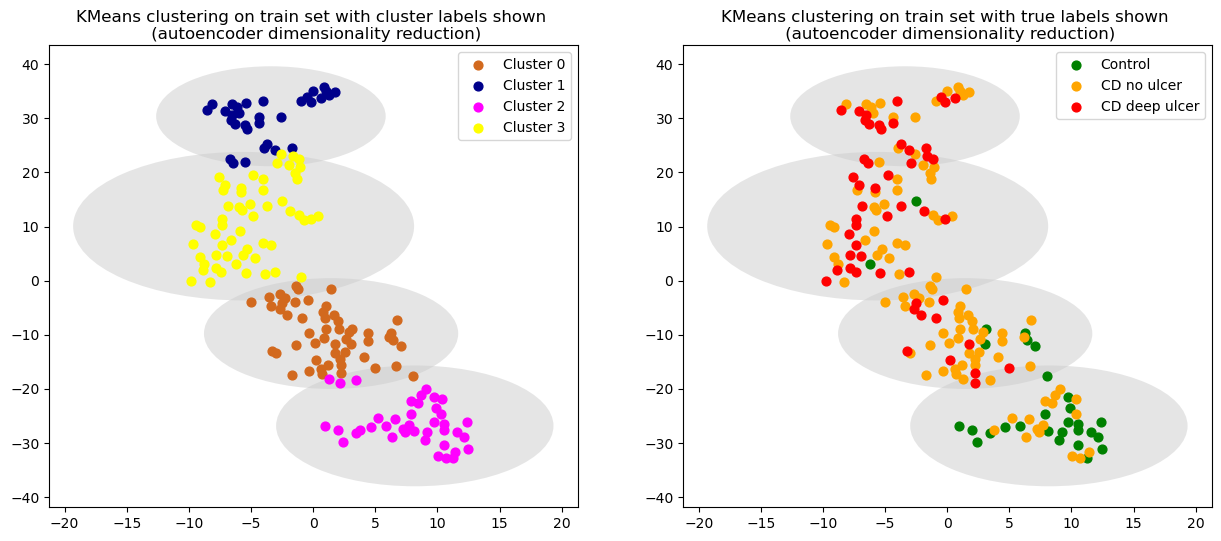

In [43]:
plot_kmeans(X_train, train_disease_labels_ext, k_labels_train, centers, radii, "autoencoder", test_set=False)

C:\Users\shard\AppData\Local\Temp\ipykernel_12868\3552133945.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(Y[label_set==i, 0], Y[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)


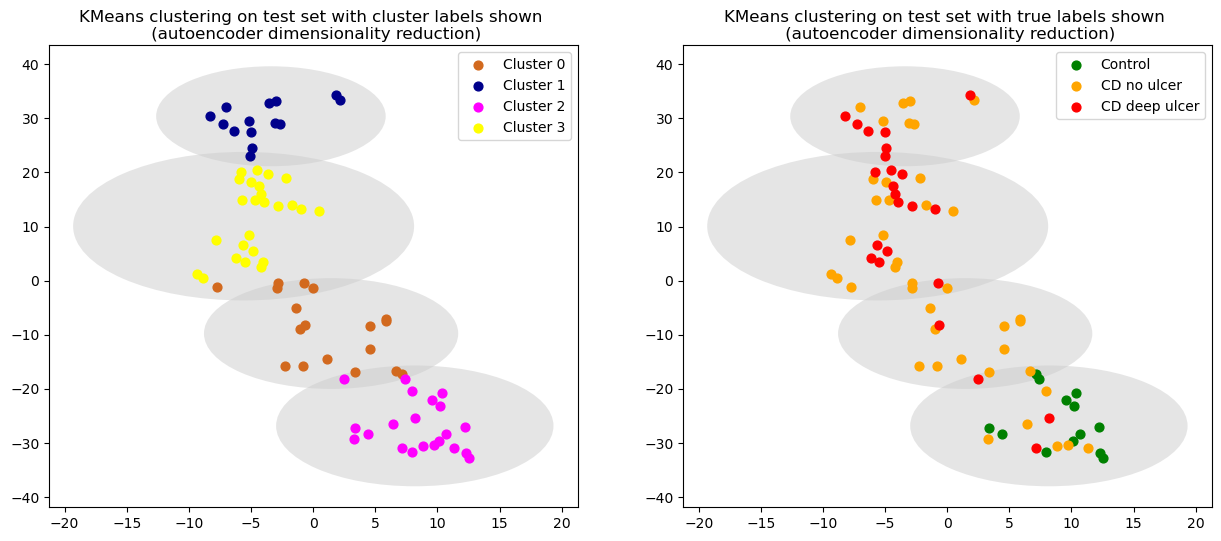

In [44]:
plot_kmeans(X_test, test_disease_labels_ext, k_labels_test, centers, radii, "autoencoder", test_set=True)

## Gaussian Mixture Models

In [45]:
# https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

from matplotlib.patches import Ellipse
from sklearn import mixture

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, true_labels, reduction, num_c=3, test=False):
    gmm_labels = gmm.predict(X)
    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))
#     ax = ax or plt.gca()
    labels = [gmm_labels, true_labels]
    num_clusters = 3
    dset = "test" if test else "train"
    for i, label_set in enumerate(labels):
        ax = subplots[i]
#         left = -8
#         right = 8
#         ax.set_xlim(left, right)
#         ax.set_ylim(left, right)
        
        
        if i==0:
            num_clusters = num_c
            cluster_names = ["Cluster " + str(i) for i in range(num_clusters)]
            colours = ["chocolate", "darkblue", "magenta", "yellow", "blue"]
            ax.set_title("GMM soft clustering on " + dset + " set with cluster labels shown \n (" + reduction + " dimensionality reduction)",
                         wrap=True)
        else:
            num_clusters = 3
            cluster_names = ["Control", "CD no ulcer", "CD deep ulcer"]
            colours = ["green", "orange", "red"]
            ax.set_title("GMM soft clustering on " + dset + " set with true labels shown \n (" + reduction + " dimensionality reduction)",
                        wrap=True)
            
        for i in range(num_clusters):
            ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2) 

        ax.axis('equal')
        

        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)
        ax.legend()
    return gmm_labels

        
# def get_tsne_ds_true_labels():
#     tsne = manifold.TSNE(
#         n_components=2,
#         init="random",
#         random_state=0,
#         perplexity=24,
#         n_iter=750,
#         method='exact'
#     )
#     X = tsne.fit_transform(test_set)

In [46]:
# gmm.means_
# gmm.covariances_
# gmm.weights_

### Fit and visualise in 2D - PCA dimensionality reduction

In [47]:
num_c = 4
gmm_pca = mixture.GaussianMixture(n_components=num_c,covariance_type='full', random_state=42)
# gmm = GMM(n_components=4, random_state=42)
# g_labels = 
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(full_pca_dataset)
X_test_pca = X[split_pt:]
X_train_pca = X[:split_pt]
gmm_pca.fit(X_train_pca)

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=4, random_state=42)

C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


array([0, 3, 0, 2, 3, 3, 2, 3, 3, 2, 2, 1, 3, 2, 2, 1, 0, 2, 3, 2, 0, 3,
       1, 0, 2, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 0, 3, 2, 3, 2, 3, 2, 2,
       2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 3, 2, 3, 3, 3, 3, 2, 2, 3, 1,
       3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 0, 2,
       0, 2, 0, 0, 3, 2, 2, 0, 3, 3, 3, 0, 2, 3, 3, 2, 1, 3, 2, 0, 3, 3,
       2, 2, 0, 3, 3, 2, 3, 2, 3, 0, 1, 2, 3, 2, 0, 2, 1, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 1, 2, 2, 1, 2, 0, 3, 2, 3, 2, 0, 3, 2, 0, 2, 2, 3, 3,
       3, 2, 3, 0, 3, 2, 2, 3, 0, 0, 3, 2, 0, 2, 2, 3, 0, 3, 3, 3, 0, 0,
       0, 1, 3, 3, 3, 3], dtype=int64)

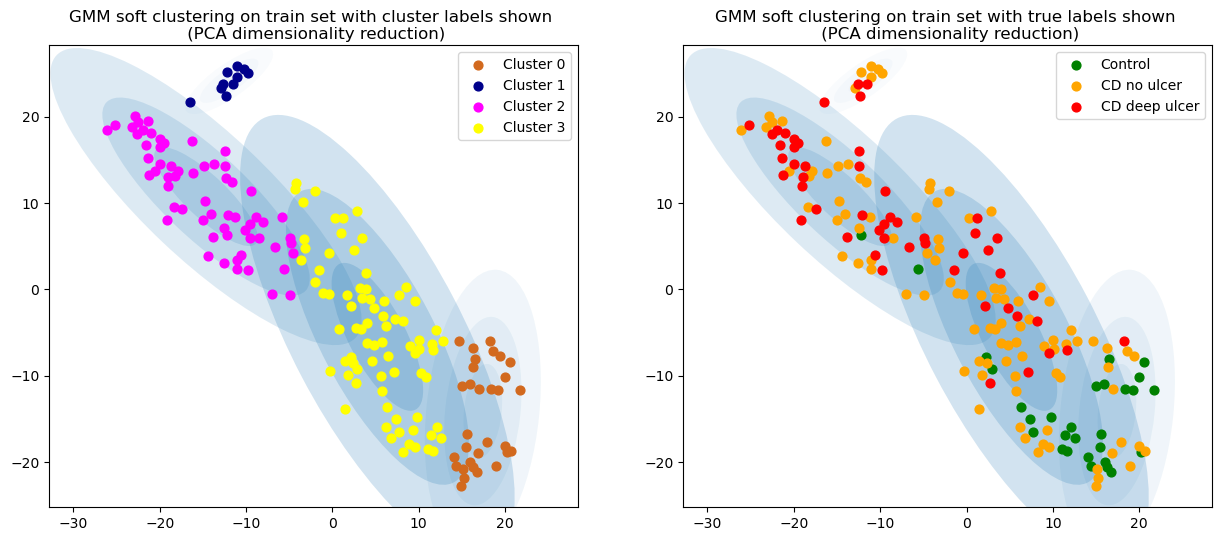

In [48]:

plot_gmm(gmm_pca, X_train_pca, train_disease_labels, "PCA", num_c=num_c)

C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


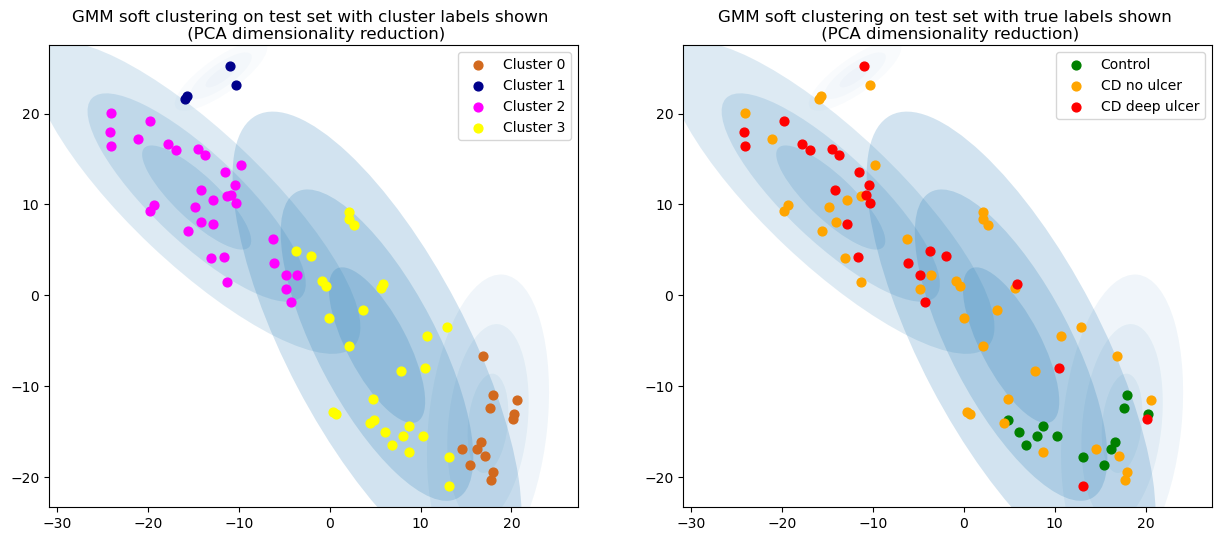

In [49]:

gmm_labels_pca = plot_gmm(gmm_pca, X_test_pca, test_disease_labels, "PCA", num_c=num_c, test=True)

### Fit and visualise in 2D - autoencoder dimensionality reduction

In [50]:
# X_train_ae

In [51]:
num_c = 4
gmm_ae = mixture.GaussianMixture(n_components=num_c,covariance_type='full', random_state=42)
# gmm = GMM(n_components=4, random_state=42)
# g_labels = 
tsne = manifold.TSNE(
    n_components=2,
    init="random",
    random_state=0,
    perplexity=24,
    n_iter=750,
    method='exact'
)
X = tsne.fit_transform(full_ae_dataset)
X_test_ae = X[split_pt:]
X_train_ae = X[:split_pt]
gmm_ae.fit(X_train_ae)

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(n_components=4, random_state=42)

C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


array([2, 3, 0, 3, 2, 3, 3, 3, 3, 1, 1, 1, 0, 1, 3, 1, 0, 3, 0, 3, 0, 0,
       1, 0, 3, 2, 3, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 2, 3, 3, 1, 1,
       2, 2, 2, 0, 2, 3, 1, 3, 3, 2, 2, 0, 2, 3, 2, 2, 3, 2, 3, 1, 2, 1,
       2, 2, 2, 3, 2, 2, 2, 0, 0, 2, 2, 3, 2, 3, 1, 3, 1, 1, 3, 2, 0, 3,
       0, 3, 0, 2, 2, 1, 3, 0, 2, 2, 3, 0, 1, 3, 2, 1, 1, 2, 3, 0, 2, 3,
       3, 1, 0, 2, 2, 1, 2, 1, 2, 0, 1, 3, 0, 3, 0, 1, 1, 1, 0, 3, 1, 3,
       3, 1, 2, 2, 1, 1, 3, 1, 3, 0, 2, 3, 3, 1, 0, 2, 3, 2, 1, 1, 2, 2,
       2, 1, 2, 2, 2, 3, 1, 2, 2, 0, 2, 1, 2, 3, 3, 0, 0, 0, 2, 0, 2, 0,
       0, 1, 3, 0, 2, 2], dtype=int64)

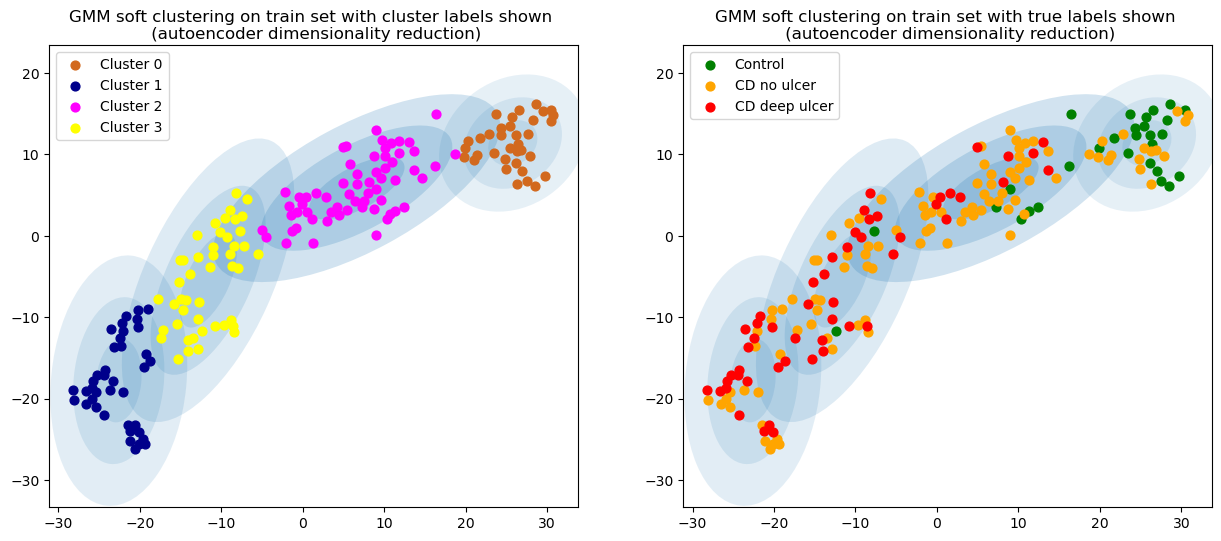

In [52]:

plot_gmm(gmm_ae, X_train_ae, train_disease_labels, "autoencoder", num_c=num_c)

C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[label_set==i, 0], X[label_set==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


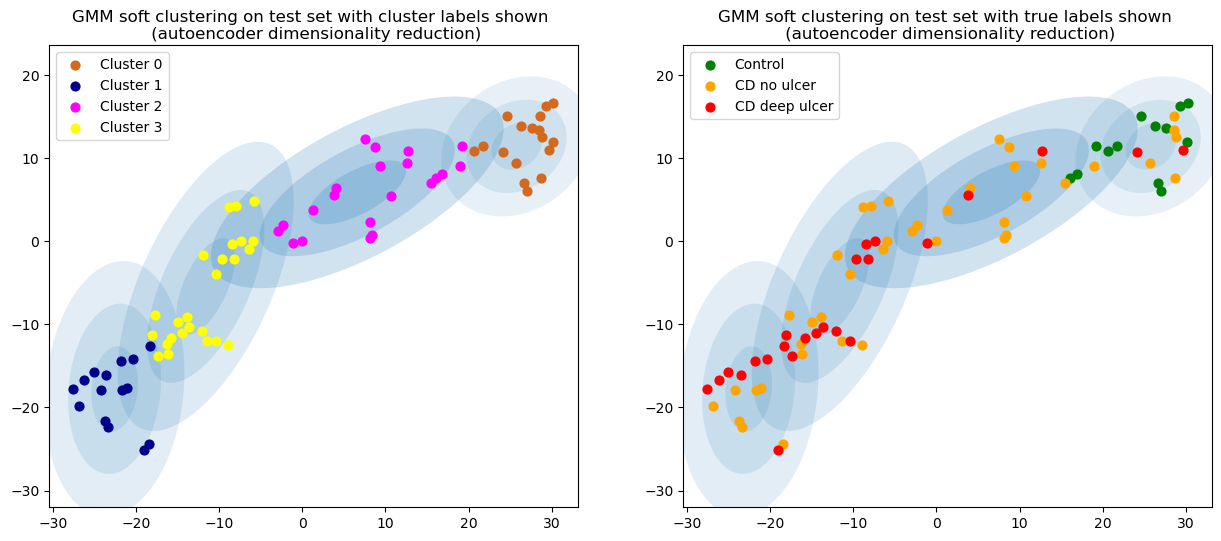

In [53]:

gmm_labels_ae = plot_gmm(gmm_ae, X_test_ae, test_disease_labels, "autoencoder", num_c=num_c, test=True)

In [54]:
import scipy.stats
from scipy.stats import multivariate_normal


In [55]:
def pair_repeat(dup, cls_assignments, num_c, amounts):
    all_clusters = np.arange(num_c)
    # replace one of the duplicates with max of remaining clusters
    replace_class = np.where(cls_assignments == dup[0])[0][0]
    rem_cluster_a, rem_cluster_b = np.setdiff1d(all_clusters,cls_assignments)
    # rem_cluster_b
    if amounts[replace_class][rem_cluster_a] > amounts[replace_class][rem_cluster_b]:
        cls_assignments[replace_class] = rem_cluster_a
    else:
        cls_assignments[replace_class] = rem_cluster_b
        
    return cls_assignments

def handle_duplicates(cls_assignments, dup, c, num_c, amounts):
#     print("c:",c)
    if len(c) != 1:
        
        cls_assignments = pair_repeat(dup, cls_assignments, num_c, amounts)
    else: # 3 repeats of same thing
        # reassign class least associated to next most associated cluster
        given_cluster = dup[0]
        cls_least = np.argmin(amounts[:,given_cluster])
#         print(cls_least)
        class_amounts = amounts[cls_least,:]
        class_amounts[given_cluster] = -1
        next_cluster = np.argmax(class_amounts)
        cls_assignments[cls_least] = next_cluster
#         print("intermediate assignments",cls_assignments)
        
        # handle other duplicate pair
        u, c = np.unique(cls_assignments, return_counts=True)
        dup = u[c > 1]
        cls_assignments = pair_repeat(dup, cls_assignments, num_c, amounts)

    return cls_assignments

In [56]:
# # cls_assignments = np.argmax(amounts, axis=1) # assigned to class 0, 1, 2
# cls_assignments = np.array([2,2,2])
# print("initial cls assignments:",cls_assignments)

In [57]:
def process_clusters_gmm(gmm, X_train, num_c):
    all_clusters = np.arange(num_c)
    mu, covar, w = gmm.means_, gmm.covariances_, gmm.weights_
    # print("means:",mu)
    # print("covariances_:",covar)
    # print("weights_:",w)
    
    comps = [multivariate_normal(mu[i], covar[i]) for i in range(num_c)]
    
    # make matrix to record amount of each class in each mixture component
    amounts = np.zeros((3, num_c))
    
    
    classes = ["control", "CD_no_ulcer", "CD_deep_ulcer"]
    for c, cls in enumerate(classes):
        for i, comp in enumerate(comps): # add up contributions for each component
            weight = w[i]
            pts = X_train[train_disease_labels==c]
            curr_sum = np.sum(comp.pdf(pts)) * weight
            amounts[c][i] = curr_sum
    print(amounts)
    #                cluster 0, cluster 1, cluster 2, cluster 3
    # control 
    # CD no ulcer
    # CD deep ulcer
    
    cls_assignments = np.argmax(amounts, axis=1) # assigned to class 0, 1, 2
    print("initial cls assignments:",cls_assignments)
    
    # check for and handle duplicates
    u, c = np.unique(cls_assignments, return_counts=True)
    dup = u[c > 1]
#     print("dup:",dup[0])
    if len(dup) > 0:
        cls_assignments = handle_duplicates(cls_assignments, dup, c, num_c, amounts)
        
            
    class_assignment_amounts = np.max(amounts, axis=1) 
    
    assignments = [None] * 3
    
    assigned = 0
    while assigned < num_c - 1:
        curr_max_class = np.argmax(class_assignment_amounts)
        assigned_cluster = cls_assignments[curr_max_class]
        if assignments[curr_max_class] is None:
            assignments[curr_max_class] = [assigned_cluster]
        else:
            assignments[curr_max_class].append(assigned_cluster)
        class_assignment_amounts[curr_max_class] = -1
        assigned += 1

    # Assign remaining cluster
    
    rem_cluster = np.setdiff1d(all_clusters,cls_assignments)[0]
    
    rem_cls_assignment = np.argmax(amounts[:,rem_cluster], axis=0)
    assignments[rem_cls_assignment].append(rem_cluster)
    couple = assignments[rem_cls_assignment]
    # clusters assigned to disease class 0, 1, 2 (control, CD_no_ulcer, CD_deep_ulcer)
    
#     print(assignments)
#     print(couple)
    return assignments, couple

In [58]:
# vis
# x, y = np.mgrid[0:30:.01, 0:30:.01]
# pos = np.dstack((x, y))
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# # for i in range(2):
# ax2.contourf(x, y, comps[0].pdf(pos))
# ax2.contourf(x, y, comps[2].pdf(pos))

In [59]:


# # check for and handle duplicates
# u, c = np.unique(cls_assignments, return_counts=True)
# dup = u[c > 1]
# print("dup:",dup[0])
# if len(dup) > 0:
#     cls_assignments = handle_duplicates(cls_assignments, dup, c)
        
# cls_assignments

In [60]:
def get_class_from_label(label, couple, assignments):
    if label in couple:
        search_term = couple
    else:
        search_term = [label]
    try:
        cls = assignments.index(search_term)
    except:
        return None
    return cls


In [61]:
def get_final_clusters_gmm(assignments, couple, gmm_labels):
    test_set_clusters = []
    for label in gmm_labels:
        cls = get_class_from_label(label, couple, assignments)
        test_set_clusters.append(cls)

    test_set_clusters = np.array(test_set_clusters)
    return test_set_clusters

### Compute final GMM cluster models and apply to test sets

3rd graph - substructure clustering processed in combination with true labels to obtain final 3 cluster clustering; model can now be easily coupled to shap

In [62]:
# gmm_labels # gmm cluster assignments across test set

In [63]:
# test_set_clusters = get_final_clusters_gmm(assignments, couple, gmm_labels)

In [64]:

# test_set_clusters

In [65]:
gmm_labels_list = [gmm_labels_ae, gmm_labels_pca]
gmm_models_list = [gmm_ae, gmm_pca]
train_set_list = [X_train_ae, X_train_pca]
test_set_list = [X_test_ae, X_test_pca]


In [66]:
# X_test_ae

[[3.44425608e-02 2.51282490e-06 8.10837699e-03 2.38645104e-03]
 [2.52158784e-02 1.85060671e-02 7.27648180e-02 2.85801795e-02]
 [1.33005274e-06 2.41975945e-02 2.03018423e-02 2.31364980e-02]]
initial cls assignments: [0 2 1]
[[1.50846395e-002 6.20783152e-117 2.74224434e-003 1.37757009e-002]
 [1.13991822e-002 2.09249474e-002 3.84224678e-002 6.23735769e-002]
 [6.67803127e-004 1.15754591e-002 4.03989222e-002 2.10052750e-002]]
initial cls assignments: [0 3 2]


C:\Users\shard\AppData\Local\Temp\ipykernel_12868\411937124.py:44: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_test[test_set_clusters==i, 0], X_test[test_set_clusters==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2)
C:\Users\shard\AppData\Local\Temp\ipykernel_12868\758358278.py:21: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


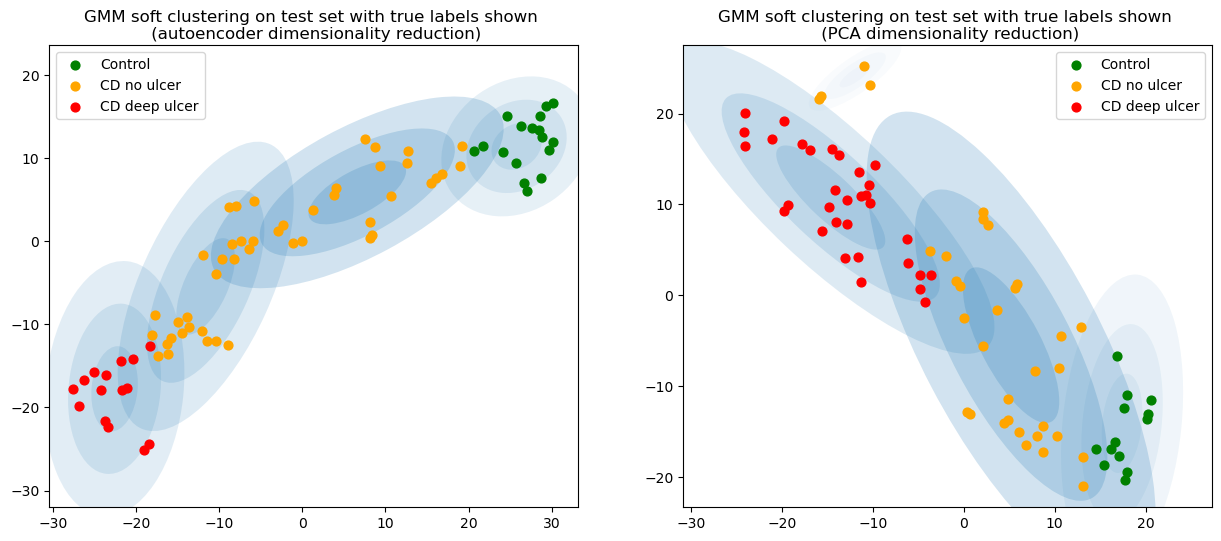

In [67]:
def plot_final_gmm_models(gmm_labels_list, gmm_models_list, train_set_list, test_set_list, num_c):
#         left = -8
#         right = 8
#         ax.set_xlim(left, right)
#         ax.set_ylim(left, right)
        
        
#         if i==0:
#             num_clusters = num_c
#             cluster_names = ["Cluster " + str(i) for i in range(num_clusters)]
#             colours = ["chocolate", "darkblue", "magenta", "yellow", "blue"]
#             ax.set_title("GMM soft clustering on " + dset + " set with cluster labels shown \n (" + reduction + " dimensionality reduction)",
#                          wrap=True)
#         else:
#     fig, ax = plt.subplots()
    (fig, subplots) = plt.subplots(1, 2, figsize=(15, 6))
    reduction = ["autoencoder", "PCA"]
    final_assignments_lst = []
    for i in range(len(gmm_models_list)):
#         print(i)
        ax = subplots[i]
        gmm = gmm_models_list[i]
        gmm_labels = gmm_labels_list[i]
        X_train = train_set_list[i]
        X_test = test_set_list[i]
        assignments, couple = process_clusters_gmm(gmm, X_train, num_c)
        test_set_clusters = get_final_clusters_gmm(assignments, couple, gmm_labels)
#         print("gmmlabels:",gmm_labels)
#         print("tsclusters:",test_set_clusters)
#         print("asgn:",assignments)
        final_assignments_lst.append(assignments)




        reduc = reduction[i]
        num_clusters = 3
        cluster_names = ["Control", "CD no ulcer", "CD deep ulcer"]
        colours = ["green", "orange", "red"]
        ax.set_title("GMM soft clustering on test set with true labels shown \n (" + reduc + " dimensionality reduction)",
                    wrap=True)

        for i in range(num_clusters):
            ax.scatter(X_test[test_set_clusters==i, 0], X_test[test_set_clusters==i, 1], c=colours[i], label=cluster_names[i], s=40, cmap='viridis', zorder=2) 

        ax.axis('equal')


        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor, ax=ax)
        ax.legend()
    
#     print(final_assignments_lst)
    return final_assignments_lst
        
final_assignments_lst = plot_final_gmm_models(gmm_labels_list, gmm_models_list, train_set_list, test_set_list, num_c)

3rd graph - substructure clustering processed in combination with true labels to obtain final 3 cluster clustering; model can now be easily coupled to shap - why better than simple k=3 clustering

In [68]:
assignments_ae, assignments_pca = final_assignments_lst

In [69]:
def get_class_from_label(label, couple, assignments):
    if label in couple:
        search_term = couple
    else:
        search_term = [label]
    try:
        cls = assignments.index(search_term)
    except:
        return None
    return cls


## Find class probabilities from cluster model

In [70]:
def get_probs(point, comps, assignments, w):
    probs = []
    for elem in assignments:
        p_cand = []
        for cluster in elem:
            p = comps[cluster].pdf(point) * w[cluster]
#             print("p:",p)
            p_cand.append(p)
#         print(p_cand)
        p = max(p_cand)
        probs.append(p)
        
    return probs

def sum_to_one(vals): 
#     print(t, u)
    return vals / vals.sum()


In [71]:
def get_proba(gmm, assignments, X_test):
    # GMM mixture component distributions
    mu, covar, w = gmm.means_, gmm.covariances_, gmm.weights_
    # print("means:",mu)
    # print("covariances_:",covar)
    # print("weights_:",w)
    comps = [multivariate_normal(mu[i], covar[i]) for i in range(num_c)]

    X_test = X_test.tolist()
    new_list = []
    for point in X_test:
        probs = get_probs(point, comps, assignments, gmm.weights_)
        new_list.append(probs)
    pdf_vals = np.asarray(new_list)

    # rescale so adds up to 1
    proba = pdf_vals.copy()
    for i in range(len(proba)):
        row = proba[i,:]
        rescaled = sum_to_one(row)

        proba[i,:] = rescaled
    
    return proba

In [72]:
assignments_ae

[[0], [2, 3], [1]]

In [73]:
assignments_pca

[[0], [3, 1], [2]]

In [74]:

assignments_ae, couple_ae = process_clusters_gmm(gmm_ae, X_train_ae, num_c)
assignments_ae

[[3.44425608e-02 2.51282490e-06 8.10837699e-03 2.38645104e-03]
 [2.52158784e-02 1.85060671e-02 7.27648180e-02 2.85801795e-02]
 [1.33005274e-06 2.41975945e-02 2.03018423e-02 2.31364980e-02]]
initial cls assignments: [0 2 1]


[[0], [2, 3], [1]]

In [75]:
assignments_pca, couple_pca = process_clusters_gmm(gmm_pca, X_train_pca, num_c)
assignments_pca

[[1.50846395e-002 6.20783152e-117 2.74224434e-003 1.37757009e-002]
 [1.13991822e-002 2.09249474e-002 3.84224678e-002 6.23735769e-002]
 [6.67803127e-004 1.15754591e-002 4.03989222e-002 2.10052750e-002]]
initial cls assignments: [0 3 2]


[[0], [3, 1], [2]]

In [76]:
# gmm = gmm_ae
# assignments = assignments_ae

In [77]:
gmm_ae_prob = get_proba(gmm_ae, assignments_ae, X_test_ae)

In [78]:
gmm_pca_prob = get_proba(gmm_pca, assignments_pca, X_test_pca)

### Clustering evaluation - mutual information score

In [79]:
test_disease_labels # true clusters to which we compare

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1,
       1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 0, 1, 2, 1,
       0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2])

In [80]:
assignments_ae

[[0], [2, 3], [1]]

In [81]:
# X_test_pca

In [82]:
# gmm_pca_prob

In [83]:
gmm_labels_ae

array([0, 2, 1, 2, 2, 0, 1, 1, 1, 0, 3, 2, 2, 3, 3, 1, 1, 3, 1, 3, 3, 2,
       0, 2, 1, 0, 0, 1, 0, 0, 2, 3, 3, 2, 2, 3, 1, 0, 3, 3, 2, 3, 3, 0,
       2, 3, 2, 0, 3, 3, 2, 1, 3, 0, 1, 0, 0, 2, 3, 1, 3, 3, 0, 1, 3, 3,
       0, 3, 2, 2, 3, 2, 0, 2, 1, 2, 3, 2], dtype=int64)

In [84]:
couple_ae

[2, 3]

In [85]:
test_set_clusters_ae = get_final_clusters_gmm(assignments_ae, couple_ae, gmm_labels_ae)
test_set_clusters_ae

array([0, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       0, 1, 2, 0, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1])

In [86]:
test_set_clusters_pca = get_final_clusters_gmm(assignments_pca, couple_pca, gmm_labels_pca)
test_set_clusters_pca

array([0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 1, 0,
       1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2])

## Retrieving probabilities across classes using GMM model

In [87]:
gmm_ae_prob = get_proba(gmm_ae, assignments_ae, X_test_ae)
gmm_ae_prob

array([[9.99317372e-01, 6.82627902e-04, 9.48725000e-77],
       [2.54799336e-07, 9.99999745e-01, 2.03042976e-31],
       [9.35776374e-80, 3.00437640e-04, 9.99699562e-01],
       [1.98183874e-20, 1.00000000e+00, 8.82917945e-13],
       [1.18247693e-08, 9.99999988e-01, 6.81454320e-28],
       [9.99898572e-01, 1.01428125e-04, 1.72058014e-74],
       [1.15271137e-74, 4.05125047e-04, 9.99594875e-01],
       [5.42580767e-54, 4.19309467e-01, 5.80690533e-01],
       [1.28362184e-59, 7.42259381e-02, 9.25774062e-01],
       [9.99661591e-01, 3.38409206e-04, 4.84798860e-69],
       [1.92184655e-48, 9.28120219e-01, 7.18797807e-02],
       [7.26142879e-12, 1.00000000e+00, 4.05548186e-23],
       [1.07778532e-02, 9.89222147e-01, 1.67285742e-42],
       [2.57949998e-39, 9.99735531e-01, 2.64468526e-04],
       [3.08617241e-27, 9.99999985e-01, 1.53351072e-08],
       [7.52713730e-72, 2.09679912e-03, 9.97903201e-01],
       [6.70390299e-76, 3.01985247e-03, 9.96980148e-01],
       [4.85199701e-34, 9.99991

In [88]:
gmm_pca_prob = get_proba(gmm_pca, assignments_pca, X_test_pca)

### Fit GMM in latent space

In [89]:
pca_train_ds = pca_train_dataset.values
pca_test_ds = pca_test_dataset.values

ae_train_ds = ae_train_dataset.values
ae_test_ds = ae_test_dataset.values

In [90]:
num_c = 4
gmm_latent_ae = mixture.GaussianMixture(n_components=num_c,covariance_type='full', random_state=42)
gmm_latent_ae.fit(ae_train_ds)
gmm_labels_latent_ae = gmm_latent_ae.predict(ae_test_ds)

gmm_latent_pca = mixture.GaussianMixture(n_components=num_c,covariance_type='full', random_state=42)
gmm_latent_pca.fit(pca_train_ds)
gmm_labels_latent_pca = gmm_latent_pca.predict(pca_test_ds)

C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\shard\anaconda3\envs\mvp4\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [91]:
# gmm_labels

In [92]:
assignments_latent_ae, couple_ae = process_clusters_gmm(gmm_latent_ae, ae_train_ds, num_c)
assignments_latent_ae

[[1.42435581e+04 4.79737894e+03 2.72982339e+00 0.00000000e+00]
 [3.89370587e+04 1.08466842e+04 1.93371858e+02 3.14770106e+19]
 [6.37916435e+03 1.97048080e+04 5.30787304e+00 2.90570282e+19]]
initial cls assignments: [0 3 3]


[[0], [1, 2], [3]]

In [93]:
assignments_latent_pca, couple_pca = process_clusters_gmm(gmm_latent_pca, pca_train_ds, num_c)
assignments_latent_pca

[[4.97483690e+06 0.00000000e+00 0.00000000e+00 2.28467242e+06]
 [4.22436258e+06 1.24261076e+14 3.87832757e+59 9.16015151e+07]
 [2.16444989e+05 2.16414823e+14 1.93917752e+59 2.19889116e+08]]
initial cls assignments: [0 2 2]


[[0], [1], [2, 3]]

In [94]:
ae_test_ds[0]

array([ 2.0323093e+00, -5.1355553e+00,  1.6310538e+00,  3.0898643e+00,
       -1.3021080e-01,  1.2836024e+00,  1.4099029e+00, -8.6836220e-04,
       -1.4571917e+00,  3.9149460e-01, -4.2501168e+00,  1.4517876e+00,
       -6.8176121e-01,  4.9846879e-01, -5.9483975e-01,  5.5427706e-01,
       -6.1358684e-01,  1.2003722e+00,  8.2509559e-01, -8.8528588e-02,
       -2.8869715e+00, -1.5514528e+00, -2.1409699e-01,  2.9676967e+00,
        1.5267386e+00,  2.7869167e+00,  8.4523277e+00, -7.9445142e-01,
        1.7468549e+00,  5.5423574e+00,  2.5479238e+00,  7.8017888e+00],
      dtype=float32)

In [95]:
gmm_ae_prob = get_proba(gmm_latent_ae, assignments_latent_ae, ae_test_ds)

In [96]:
gmm_pca_prob = get_proba(gmm_latent_pca, assignments_latent_pca, pca_test_ds)

C:\Users\shard\AppData\Local\Temp\ipykernel_12868\2844544188.py:17: RuntimeWarning: invalid value encountered in true_divide
  return vals / vals.sum()


In [97]:
gmm_test_set_clusters_ae = get_final_clusters_gmm(assignments_ae, couple_ae, gmm_labels_ae)
gmm_test_set_clusters_ae

array([0, None, None, None, None, 0, None, None, None, 0, None, None,
       None, None, None, None, None, None, None, None, None, None, 0,
       None, None, 0, 0, None, 0, 0, None, None, None, None, None, None,
       None, 0, None, None, None, None, None, 0, None, None, None, 0,
       None, None, None, None, None, 0, None, 0, 0, None, None, None,
       None, None, 0, None, None, None, 0, None, None, None, None, None,
       0, None, None, None, None, None], dtype=object)

In [98]:
gmm_labels_pca

array([0, 0, 2, 3, 3, 0, 2, 2, 2, 0, 2, 3, 3, 2, 2, 2, 1, 2, 2, 2, 3, 3,
       0, 3, 1, 0, 0, 1, 0, 0, 3, 2, 2, 3, 3, 2, 2, 0, 2, 2, 3, 3, 3, 0,
       3, 2, 3, 0, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 3, 3, 3, 2, 3, 0, 3, 1, 3, 2, 2], dtype=int64)

In [99]:
gmm_test_set_clusters_pca = get_final_clusters_gmm(assignments_pca, couple_pca, gmm_labels_pca)
gmm_test_set_clusters_pca

array([0, 0, None, None, None, 0, None, None, None, 0, None, None, None,
       None, None, None, None, None, None, None, None, None, 0, None,
       None, 0, 0, None, 0, 0, None, None, None, None, None, None, None,
       0, None, None, None, None, None, 0, None, None, None, 0, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None,
       None, 0, None, None, None, None, None], dtype=object)

### Save model

### Evaluation

In [100]:
# test_set_clusters_ae = get_final_clusters_gmm(assignments, couple, gmm_labels)